In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
import seaborn as sns

%matplotlib inline

In [ ]:
train_df = pd.read_csv("./train.csv")
test_df  = pd.read_csv("./test.csv")
y_test   = pd.read_csv("./gender_submission.csv")
train_df = train_df.set_index('PassengerId')
test_df  = test_df.set_index('PassengerId')
y_test   = y_test.set_index('PassengerId')
train_df.head(5)

In [ ]:
train_df.info()

In [ ]:
train_df.isnull().sum()

In [ ]:
train_df.describe()

## Knn

In [ ]:
train_df["Age"].fillna(train_df["Age"].median())

In [ ]:
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

In [ ]:
train_df = train_df.drop(columns=["Name", "Ticket", "Cabin"])

In [ ]:
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})

In [ ]:
train_df["Embarked"] = train_df["Embarked"].map({"C": 0, "Q": 1, "S": 2})

In [ ]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

In [ ]:
train_df.head(5)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

Accuracy: 0.81564


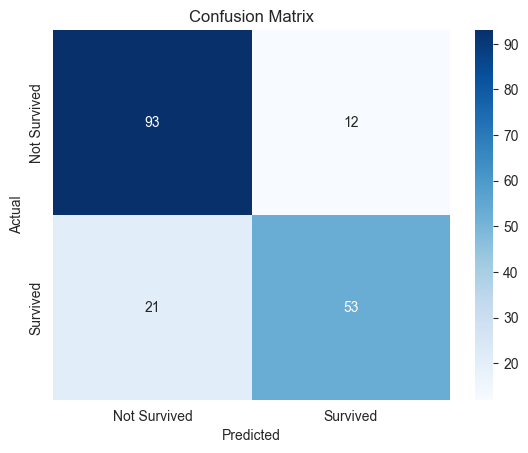

[[93 12]
 [21 53]]
              precision    recall  f1-score   support

Not Survived       0.82      0.89      0.85       105
    Survived       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

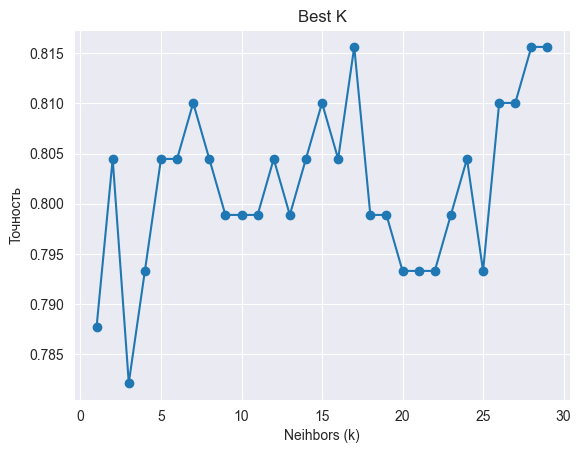

(17, 0.8156424581005587)

In [45]:
import matplotlib.pyplot as plt

accuracies = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 30), accuracies, marker='o')
plt.title("Best K")
plt.xlabel("Neihbors (k)")
plt.ylabel("Точность")
plt.show()

index = accuracies.index(max(accuracies))
index+1, max(accuracies)